# Arrays, Tuples, Ranges, and Other Fundamental Types

## Exercise 1

In [1]:
using LinearAlgebra

In [264]:
A = [0.8 -0.2; -0.1 0.7]
Σ = [0.5 0.4; 0.4 0.6]

@assert size(A) == size(Σ)
S = zeros(size(A))
ΣΣ = Σ * Σ'
maxiter = 1000
tol = 1.0e-7

exitbeforemax = false
for t in 1:maxiter
    S_old = S
    S = A * S * A' + ΣΣ
    if norm(S-S_old) < tol
        exitbeforemax = true
        println("No. of iterations: ", t)
        break
    end
end
if ! exitbeforemax
    println("Max. No. of Iterations reached!")
end
S

No. of iterations: 61


2×2 Array{Float64,2}:
 0.671231  0.633474
 0.633474  0.858874

In [3]:
using QuantEcon

┌ Info: Precompiling QuantEcon [fcd29c91-0bd7-5a09-975d-7ac3f643a60c]
└ @ Base loading.jl:1278


In [5]:
solve_discrete_lyapunov(A, ΣΣ)

2×2 Array{Float64,2}:
 0.671231  0.633474
 0.633474  0.858874

## Exercise 2

In [4]:
using Parameters, Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [33]:
function getts(T,parameters)
    @unpack γ, θ, σ, y0 = parameters
    y = y0 .* ones(T)
    for i in 2:T
        y[i] = γ + θ * y[i-1] + σ * randn()
    end
    return y
end

function getrollmean(x)
    @assert ndims(x) == 1
    if typeof(x) == Array{Int64,1}
        x = convert(Array{Float64,1}, x)
    end
    y = similar(x)
    for i in eachindex(x)
        y[i] = sum(x[1:i]) / i
    end
    return y
end

getrollmean (generic function with 1 method)

In [127]:
using LaTeXStrings
gr()

Plots.GRBackend()

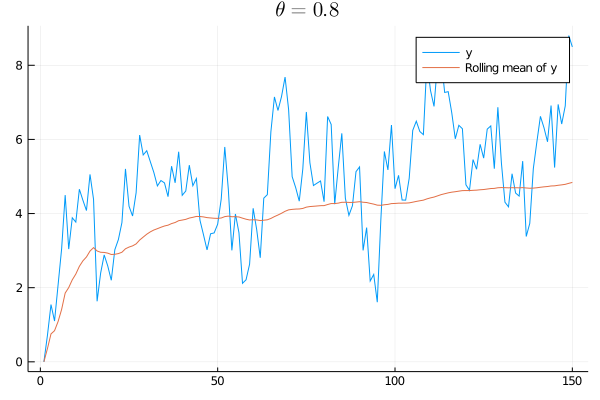

In [133]:

T = 150
θ = 0.8
y = getts(T, (γ=1,σ=1,y0=0,θ=θ))
plot(1:T, y, label="y", title=latexstring("\\theta=", θ))
plot!(1:T, getrollmean(y), label="Rolling mean of y")


In [134]:
function getyT(N, parameters)
    yT = zeros(N)
    for i in 1:N
        y = getts(T, parameters)
        yT[i] = y[T]
    end
    return yT
end


getyT (generic function with 1 method)

In [203]:
using Statistics

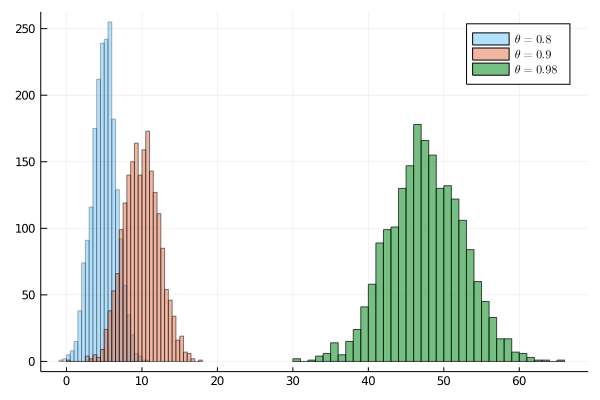

Mean:
θ=0.8: 5.002228749175209
θ=0.9: 9.937126204411728
θ=0.98: 47.59530342487524
Stdev:
θ=0.8: 1.633402836179035
θ=0.9: 2.3348684417119006
θ=0.98: 4.9253209312282324


In [207]:
N = 2000
params = (γ=1,σ=1,y0=0)
yT_1 = getyT(N, merge(params, (θ=0.8,)))
yT_2 = getyT(N, merge(params, (θ=0.9,)))
yT_3 = getyT(N, merge(params, (θ=0.98,)))
plt = histogram(yT_1, alpha=0.3, label=latexstring("\\theta=",0.8))
histogram!(yT_2, alpha=0.5, label=latexstring("\\theta=",0.9))
histogram!(yT_3, alpha=0.7, label=latexstring("\\theta=",0.98))
println("Mean:")
println("θ=0.8: $(mean(yT_1))")
println("θ=0.9: $(mean(yT_2))")
println("θ=0.98: $(mean(yT_3))")
println("Stdev:")
println("θ=0.8: $(std(yT_1))")
println("θ=0.9: $(std(yT_2))")
println("θ=0.98: $(std(yT_3))")
display(plt)

## Exercise 3

In [221]:
using LinearAlgebra

In [222]:
N = 50
M = 20
a = 0.1
b = 0.2
c = 0.5
d = 1.0
σ = 0.1

x1 = randn(N)
x2 = randn(N)
y = zeros(N, M)
for i in 1:M
    y[:, i] = a.*x1 .+ b.*x1.^2 .+ c.*x2 .+ d .+ σ.*randn(N)
end

X = hcat(x1, x1.^2, x2, ones(N))

βs = zeros(M, 4)
σs = zeros(M)

for i in 1:M
    β = X \ y[:,i]
    ϵ = y[:,i] - X * β
    βs[i,:] = β
    σs[i] = ϵ⋅ϵ / (N - 4)
end


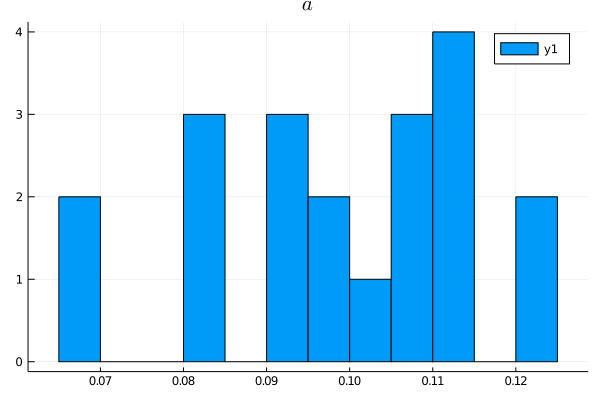

In [226]:
histogram(βs[:,1], bins=10, title=L"a")

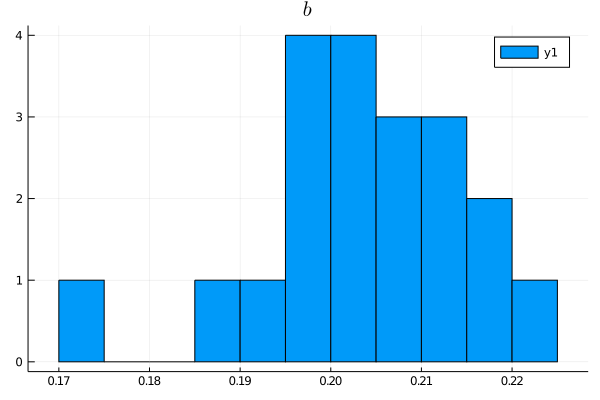

In [227]:
histogram(βs[:,2], bins=10, title=L"b")

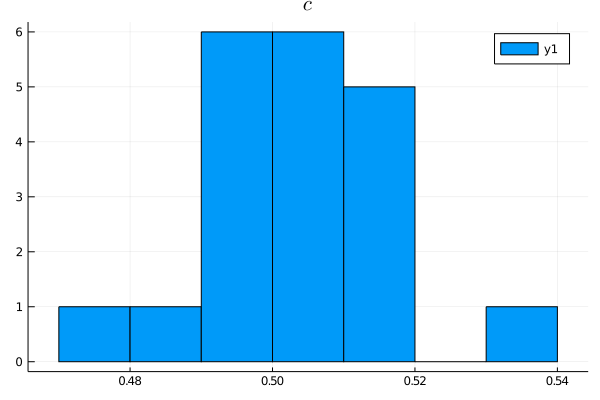

In [228]:
histogram(βs[:,3], bins=10, title=L"c")

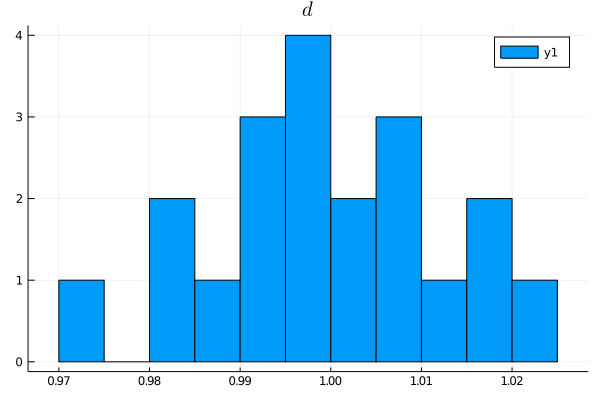

In [229]:
histogram(βs[:,4], bins=10, title=L"d")

## Exercise 4

In [265]:
using NLsolve

┌ Info: Precompiling NLsolve [2774e3e8-f4cf-5e23-947b-6d7e65073b56]
└ @ Base loading.jl:1278


In [266]:
A = [0.8 -0.2; -0.1 0.7]
Σ = [0.5 0.4; 0.4 0.6]

f(S) = A * S * A' + Σ * Σ'

fixedpoint(f, zeros(2, 2))

Results of Nonlinear Solver Algorithm
 * Algorithm: Anderson m=4 beta=1 aa_start=1 droptol=0
 * Starting Point: [0.0 0.0; 0.0 0.0]
 * Zero: [0.6712314073226602 0.6334739702517141; 0.6334739702517141 0.8588744279176208]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 0